# ${\color{pink}\mathbb{Mission}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy
from scipy.optimize import minimize

In [2]:
N = 100
a = 2
b = 1

def func(x,a=2,b=1):
    return a*x + b

In [27]:
x_points = np.random.rand(N)   #(points between 0 and 1) 

noise = np.random.normal(0, 0.5, size=N)

#noise = np.random.normal(-0.25, 0.25, size=N)  
y_points = func(x_points) + noise


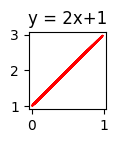

In [29]:
y_line = func(x_points)
plt.figure(figsize=(1,1))
plt.plot(x_points,y_line,  color="red")
plt.title("y = 2x+1")
plt.show()

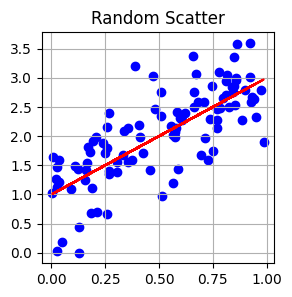

In [30]:
plt.figure(figsize=(3, 3))
plt.scatter(x_points, y_points, color="blue")
plt.plot(x_points,y_line,  color="red")

plt.title("Random Scatter")
plt.grid(True)
plt.show()

### ${\color{pink}\mathbb{Least-Squares-Part}}$

In [31]:
def lst_func(ab_list):
    a = ab_list[0]
    b = ab_list[1]
    error_lst = np.sum((y_points - func(x_points,a,b))**2) /2
    return error_lst

In [32]:
minab = scipy.optimize.minimize(lst_func,[0,0])
min_a,min_b = minab.x

min_a_lst = round(min_a,3)
min_b_lst = round(min_b,3)
print(f"y = {min_a_lst}x + {min_b_lst}")


y = 1.957x + 1.048


### ${\color{pink}\mathbb{L1}}$

In [33]:
def l1_func(ab_list):
    a,b = ab_list
    error_l1 = np.sum(np.abs( y_points - func(x_points,a,b) ))
    return error_l1

In [34]:
minab = scipy.optimize.minimize(l1_func,[0,0])
min_a,min_b = minab.x

min_a_l1 = round(min_a,3)
min_b_l1 = round(min_b,3)
print(f"y = {min_a_l1}x + {min_b_l1}")

y = 1.859x + 1.141


### ${\color{pink}\mathbb{L-inf}}$

In [35]:
def l_inf_func(ab_list):
    a,b = ab_list

    max_error = 0
    for i in range(N):
        if np.abs( y_points[i] - func(x_points[i],a,b) ) > max_error :
            max_error = np.abs( y_points[i] - func(x_points[i],a,b) )

    return max_error

In [36]:
minab = scipy.optimize.minimize(l_inf_func,[0,0])
min_a,min_b = minab.x

min_a_linf = round(min_a,3)
min_b_linf = round(min_b,3)
print(f"y = {min_a_linf}x + {min_b_linf}")

y = 1.265x + 1.278


plotting all:

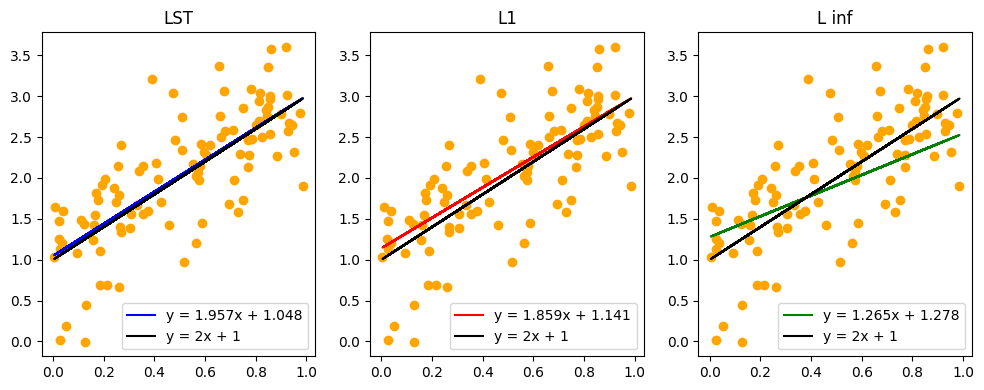

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

axs[0].plot(x_points,func(x_points,min_a_lst,min_b_lst), label=f"y = {min_a_lst}x + {min_b_lst}",  color="blue")      #lst approx.
axs[0].scatter(x_points, y_points, color="orange")
axs[0].plot(x_points,func(x_points), label=f"y = {a}x + {b}",  color="black")      #original.


axs[0].set_title('LST')

axs[1].plot(x_points,func(x_points,min_a_l1,min_b_l1), label=f"y = {min_a_l1}x + {min_b_l1}",  color="red")           #l1 approx.
axs[1].scatter(x_points, y_points, color="orange")
axs[1].plot(x_points,func(x_points), label=f"y = {a}x + {b}",  color="black")     
axs[1].set_title('L1')


axs[2].plot(x_points,func(x_points,min_a_linf,min_b_linf), label=f"y = {min_a_linf}x + {min_b_linf}",  color="green")       #l-inf approx.
axs[2].scatter(x_points, y_points, color="orange")
axs[2].plot(x_points,func(x_points), label=f"y = {a}x + {b}",  color="black")      
axs[2].set_title('L inf')


axs[0].legend()
axs[1].legend()
axs[2].legend()

plt.tight_layout()
plt.show()


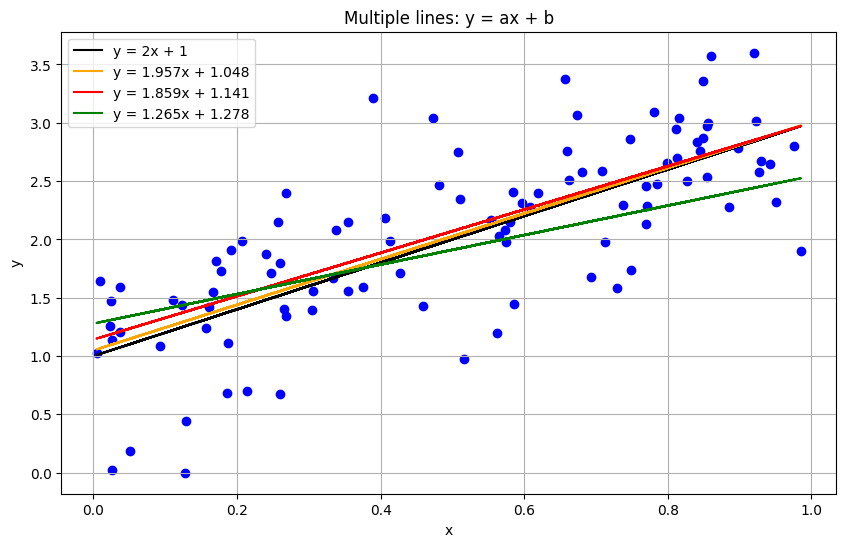

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(x_points,func(x_points), label=f"y = {a}x + {b}",  color="black")      #original.

plt.plot(x_points,func(x_points,min_a_lst,min_b_lst), label=f"y = {min_a_lst}x + {min_b_lst}",  color="orange")      #lst approx.
plt.plot(x_points,func(x_points,min_a_l1,min_b_l1), label=f"y = {min_a_l1}x + {min_b_l1}",  color="red")           #l1 approx.
plt.plot(x_points,func(x_points,min_a_linf,min_b_linf), label=f"y = {min_a_linf}x + {min_b_linf}",  color="green")       #l-inf approx.

plt.scatter(x_points, y_points, color="blue")


plt.xlabel("x")
plt.ylabel("y")
plt.title("Multiple lines: y = ax + b")
plt.legend()
plt.grid(True)
plt.show()

### ${\color{pink}\mathbb{-------------}}$

### ${\color{pink}\mathbb{Matrix-Form}}$

##### ${\color{pink}\mathbb{l1}}$

--------------------------

$$
\min_{a, b} \sum^{N}_{i=1} |y_i - (a x_i + b)| = \min_{a, b} |Y - (aX + b) | =  \min_{V} ||Y - AV ||_1 \\

A = \begin{bmatrix}
x_1 & 1 \\
x_2 & 1 \\
. & . \\
x_N & 1 \end{bmatrix}

V = \begin{bmatrix}
a \\
b \end{bmatrix}


Y = \begin{bmatrix}
y_1 \\
y_2 \\
. \\
y_N \end{bmatrix}


$$



$$

aX + b = \begin{bmatrix} 
a \cdot x_1 \\ 
a \cdot x_2 \\ 
. \\ 
a \cdot x_n \end{bmatrix} 
+
\begin{bmatrix} 
b \\ 
b \\ 
. \\ 
b \end{bmatrix} 

$$

-------

$$

\min_{V} ||Y - AV ||_1 \\
||Y - AV ||_1 = \sum^{N}_{i=1}|Y_i-A_iV| \\
z = |Y - AV| \\ \quad 
z \geq 0 \\
$$
------
final way:
$$
\min_{V,z} \sum^{N}_{i=1} z_i\\
\text{s.t} \\ \quad
\begin{matrix}
Y_i - A_iV \leq z_i \\
-Y_i + A_iV \leq z_i \end{matrix}



$$

##### ${\color{pink}\mathbb{l-inf}}$

the same way as L1
$$

\min_{a, b} [\max_{i=1,..,N} \sum^{N}_{i=1} |y_i - (a x_i + b)|] = \min_{V}  ||Y - AV ||_{\infty} 



$$


$$
z \geq |Y - AV| \\ \quad
z \geq 0 
$$
---------------
final way:
$$
\min_{V,z}  z\\
\text{s.t} \\ \quad
\begin{matrix}
Y_i - A_iV \leq z \\
-Y_i + A_iV \leq z \end{matrix}

$$

-----------------

For L2 (least squares approx.)
$$
\min_{a, b} ||Ax-b||^{2} _{2}
$$

$$

\nabla f = A^TAx-A^T b \\
 A^TAx - A^T b = 0 \\
 A^TAx = A^T b \\ \quad
\\ \text{if $A^TA$ is inversable then:} \\
 x = (A^TA)^{-1}A^Tb
$$